# Import packages and Settings

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# MetaData

## Train Data

In [20]:
train_data = pd.read_csv('./Data/train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [233]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [234]:
train_data.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [235]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Test Data

In [21]:
test_data = pd.read_csv('./Data/test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [237]:
test_data.describe(include=['number'])

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [238]:
test_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [22]:
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
test_data['Sex'] = test_data['Sex'].map({'male':0, 'female':1})

# Univariate Analysis

## Survived

In [240]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Pclass

In [241]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [242]:
test_data['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

## Sex

In [243]:
train_data['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [244]:
test_data['Sex'].value_counts()

Sex
0    266
1    152
Name: count, dtype: int64

## SibSp

In [245]:
train_data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [246]:
test_data['SibSp'].value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

## Parch

In [247]:
train_data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [248]:
test_data['Parch'].value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

## Embarked

In [249]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [250]:
test_data['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

## Age

<Axes: >

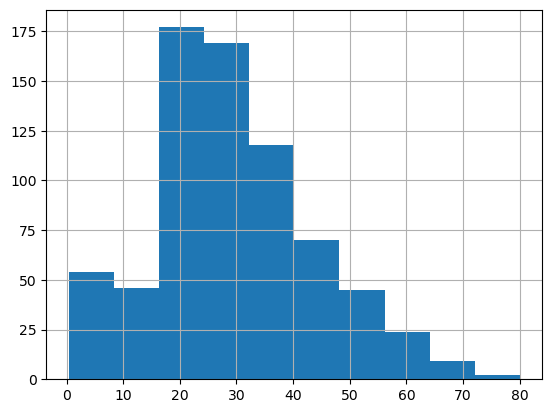

In [251]:
train_data['Age'].hist()

<Axes: >

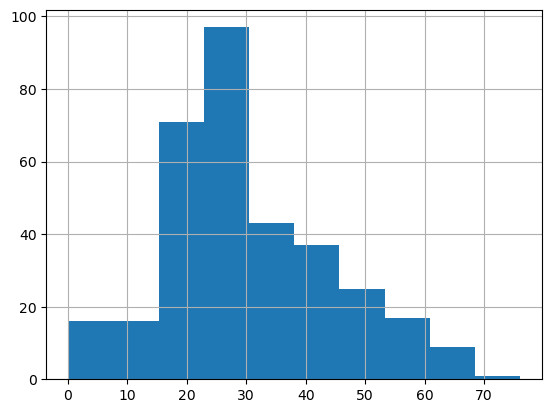

In [252]:
test_data['Age'].hist()

## Fare

In [24]:
test_data.loc[test_data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S


<Axes: >

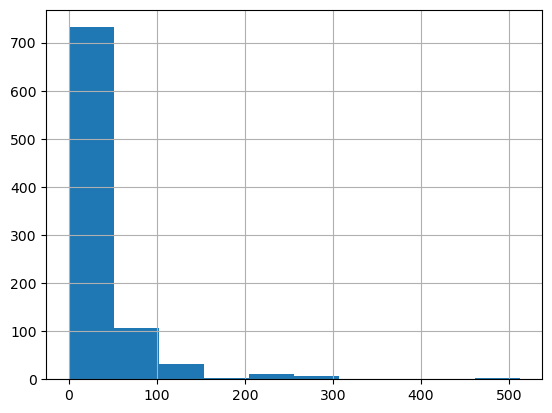

In [253]:
train_data['Fare'].hist()

<Axes: >

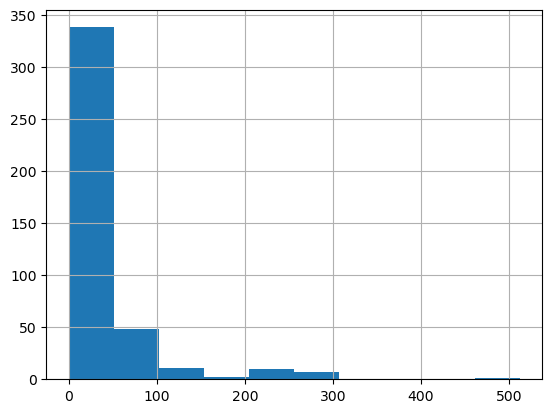

In [254]:
test_data['Fare'].hist()

# Multivariate Analysis

## HeatMap

<Axes: >

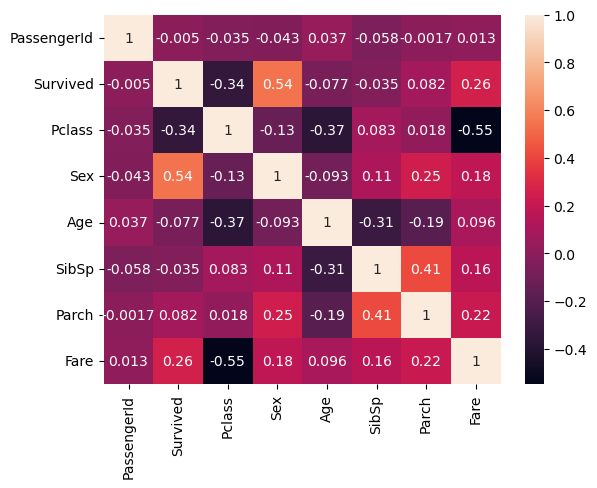

In [255]:
corr = train_data.select_dtypes(exclude='O').corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Survived

In [256]:
corr['Survived'].abs().sort_values(ascending=False)

Survived       1.000000
Sex            0.543351
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

In [257]:
train_data[['Survived', 'Sex']].groupby(['Sex']).mean().sort_values('Survived', ascending=False)

,Survived
Sex,
1,0.742038
0,0.188908


In [258]:
train_data[['Survived', 'Pclass']].groupby(['Pclass']).mean().sort_values('Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Fare', ylabel='Count'>

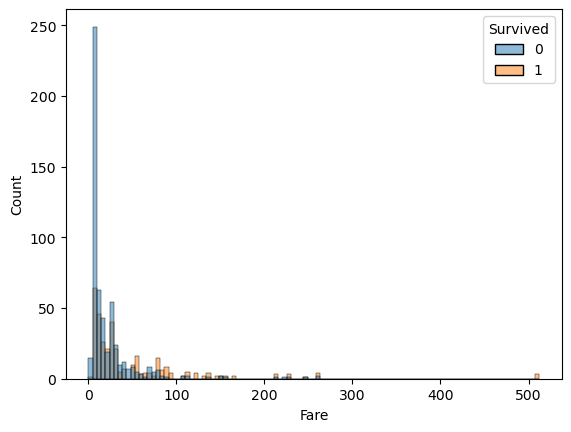

In [259]:
sns.histplot(train_data, x='Fare', hue='Survived')

In [260]:
train_data[['Survived', 'Parch']].groupby(['Parch']).mean().sort_values('Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


<Axes: xlabel='Age', ylabel='Count'>

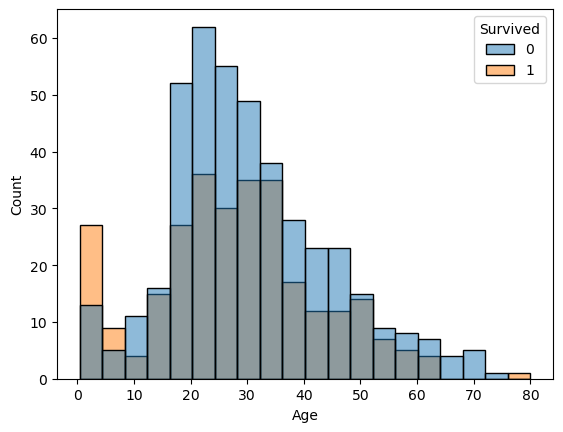

In [261]:
sns.histplot(train_data, x='Age', hue='Survived')

In [262]:
train_data[['Survived', 'SibSp']].groupby(['SibSp']).mean().sort_values('Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [263]:
train_data[['Survived', 'Embarked']].groupby(['Embarked']).mean().sort_values('Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


## Sex

In [264]:
corr['Sex'].abs().sort_values(ascending=False)

Sex            1.000000
Survived       0.543351
Parch          0.245489
Fare           0.182333
Pclass         0.131900
SibSp          0.114631
Age            0.093254
PassengerId    0.042939
Name: Sex, dtype: float64

In [265]:
pd.crosstab(train_data['Parch'], train_data['Sex'])

Sex,0,1
Parch,,
0,484,194
1,58,60
2,31,49
3,1,4
4,2,2
5,1,4
6,0,1


In [266]:
pd.crosstab(test_data['Parch'], test_data['Sex'])

Sex,0,1
Parch,,
0,225,99
1,24,28
2,13,20
3,1,2
4,0,2
5,1,0
6,1,0
9,1,1


<Axes: xlabel='Fare', ylabel='Count'>

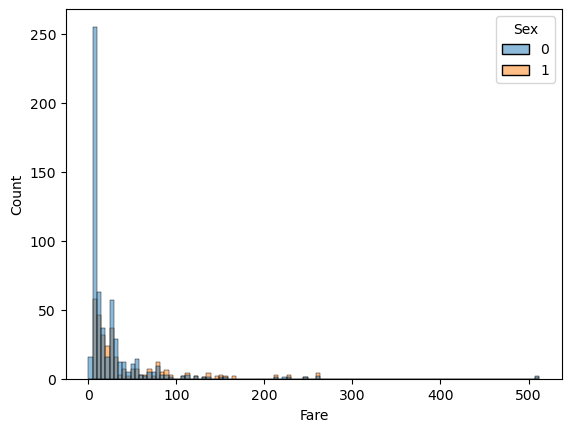

In [267]:
sns.histplot(train_data, x='Fare', hue='Sex')

<Axes: xlabel='Fare', ylabel='Count'>

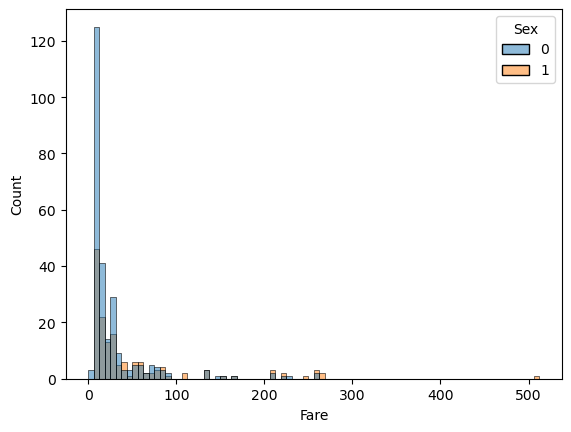

In [268]:
sns.histplot(test_data, x='Fare', hue='Sex')

In [269]:
pd.crosstab(train_data['Pclass'], train_data['Sex'])

Sex,0,1
Pclass,,
1,122,94
2,108,76
3,347,144


In [270]:
pd.crosstab(test_data['Pclass'], test_data['Sex'])

Sex,0,1
Pclass,,
1,57,50
2,63,30
3,146,72


In [271]:
pd.crosstab(train_data['SibSp'], train_data['Sex'])

Sex,0,1
SibSp,,
0,434,174
1,103,106
2,15,13
3,5,11
4,12,6
5,4,1
8,4,3


In [272]:
pd.crosstab(test_data['SibSp'], test_data['Sex'])

Sex,0,1
SibSp,,
0,195,88
1,56,54
2,8,6
3,3,1
4,3,1
5,0,1
8,1,1


<Axes: xlabel='Age', ylabel='Count'>

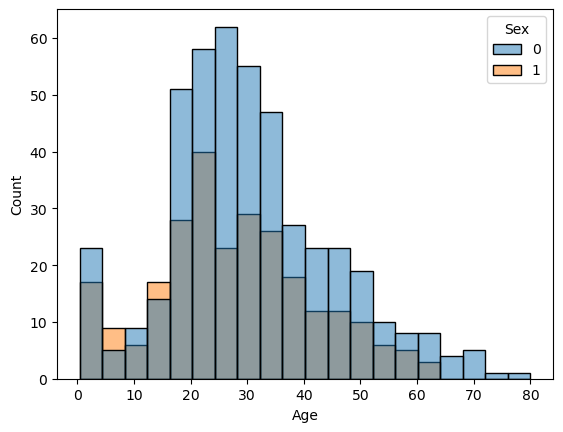

In [273]:
sns.histplot(train_data, x='Age', hue='Sex')

<Axes: xlabel='Age', ylabel='Count'>

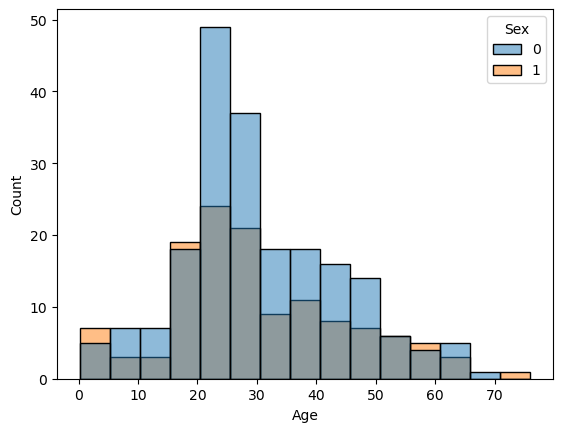

In [274]:
sns.histplot(test_data, x='Age', hue='Sex')

In [275]:
pd.crosstab(train_data['Embarked'], train_data['Sex'])

Sex,0,1
Embarked,,
C,95,73
Q,41,36
S,441,203


In [276]:
pd.crosstab(test_data['Embarked'], test_data['Sex'])

Sex,0,1
Embarked,,
C,62,40
Q,22,24
S,182,88


## Pclass

In [277]:
corr['Pclass'].abs().sort_values(ascending=False)

Pclass         1.000000
Fare           0.549500
Age            0.369226
Survived       0.338481
Sex            0.131900
SibSp          0.083081
PassengerId    0.035144
Parch          0.018443
Name: Pclass, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

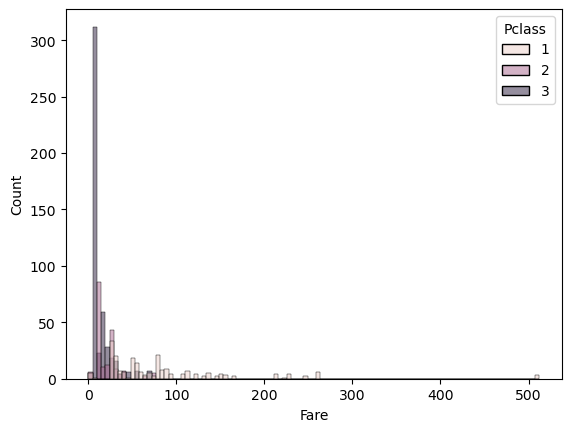

In [278]:
sns.histplot(train_data, x='Fare', hue='Pclass')

<Axes: xlabel='Fare', ylabel='Count'>

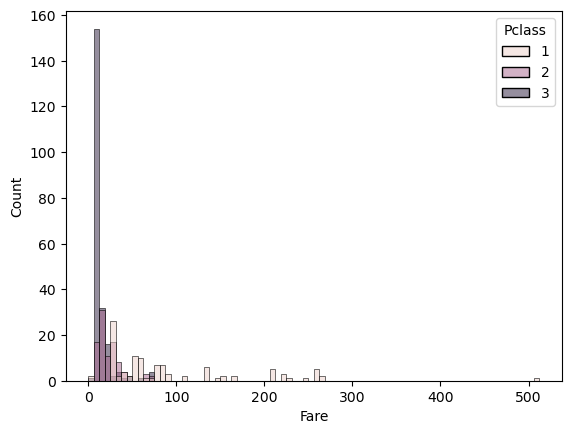

In [279]:
sns.histplot(test_data, x='Fare', hue='Pclass')

<Axes: xlabel='Age', ylabel='Count'>

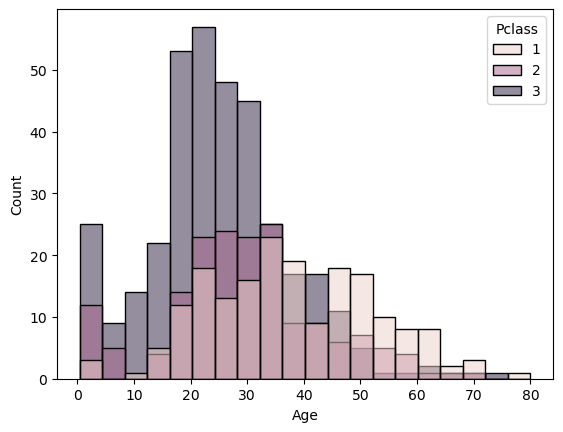

In [280]:
sns.histplot(train_data, x='Age', hue='Pclass')

<Axes: xlabel='Age', ylabel='Count'>

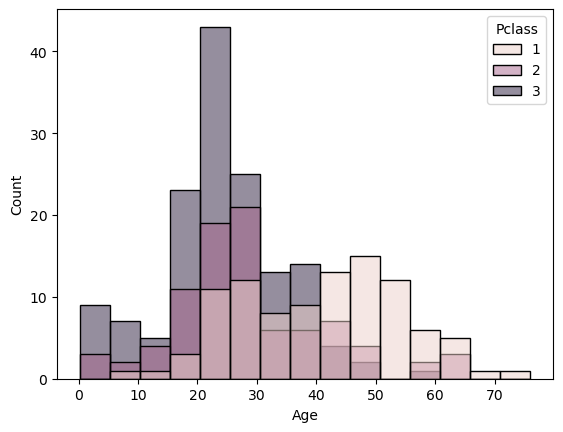

In [281]:
sns.histplot(test_data, x='Age', hue='Pclass')

In [282]:
pd.crosstab(train_data['Embarked'], train_data['Pclass'])

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


In [283]:
pd.crosstab(test_data['Embarked'], test_data['Pclass'])

Pclass,1,2,3
Embarked,,,
C,56,11,35
Q,1,4,41
S,50,78,142


## Parch

In [284]:
corr['Parch'].abs().sort_values(ascending=False)

Parch          1.000000
SibSp          0.414838
Sex            0.245489
Fare           0.216225
Age            0.189119
Survived       0.081629
Pclass         0.018443
PassengerId    0.001652
Name: Parch, dtype: float64

In [285]:
pd.crosstab(train_data['SibSp'], train_data['Parch'])

Parch,0,1,2,3,4,5,6
SibSp,,,,,,,
0,537,38,29,1,1,2,0
1,123,57,19,3,3,3,1
2,16,7,4,1,0,0,0
3,2,7,7,0,0,0,0
4,0,9,9,0,0,0,0
5,0,0,5,0,0,0,0
8,0,0,7,0,0,0,0


In [286]:
pd.crosstab(test_data['SibSp'], test_data['Parch'])

Parch,0,1,2,3,4,5,6,9
SibSp,,,,,,,,
0,253,14,14,1,1,0,0,0
1,60,33,10,2,1,1,1,2
2,10,2,2,0,0,0,0,0
3,1,2,1,0,0,0,0,0
4,0,1,3,0,0,0,0,0
5,0,0,1,0,0,0,0,0
8,0,0,2,0,0,0,0,0


<Axes: xlabel='Fare', ylabel='Count'>

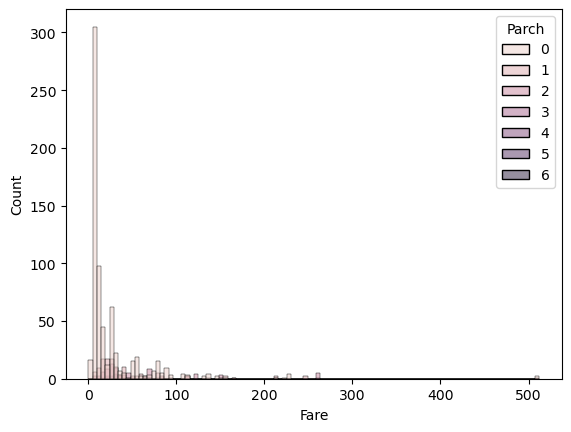

In [287]:
sns.histplot(train_data, x='Fare', hue='Parch')

<Axes: xlabel='Fare', ylabel='Count'>

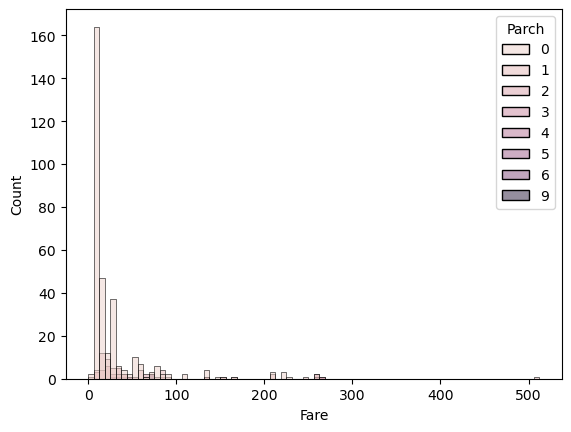

In [288]:
sns.histplot(test_data, x='Fare', hue='Parch')

<Axes: xlabel='Age', ylabel='Count'>

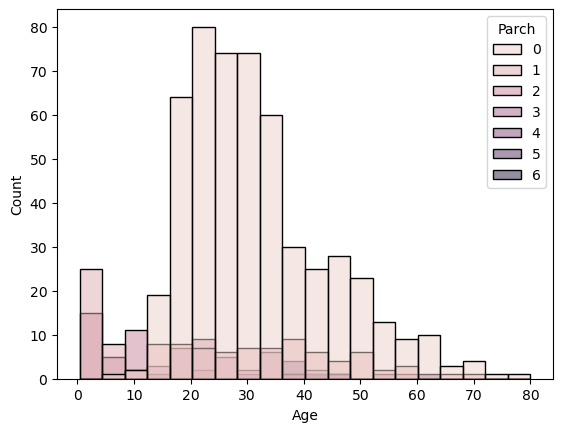

In [289]:
sns.histplot(train_data, x='Age', hue='Parch')

<Axes: xlabel='Age', ylabel='Count'>

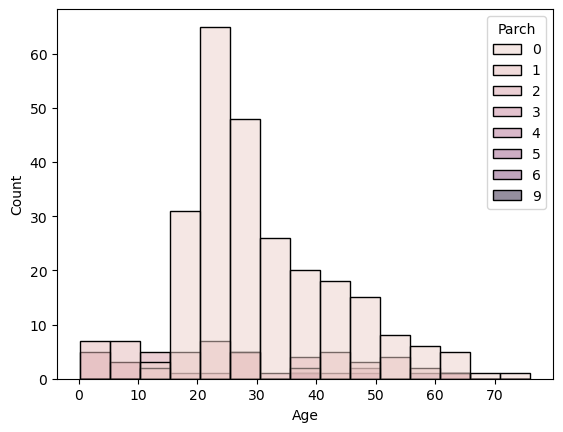

In [290]:
sns.histplot(test_data, x='Age', hue='Parch')

In [291]:
pd.crosstab(train_data['Embarked'], train_data['Parch'])

Parch,0,1,2,3,4,5,6
Embarked,,,,,,,
C,123,30,14,1,0,0,0
Q,69,6,1,0,0,1,0
S,484,82,65,4,4,4,1


In [292]:
pd.crosstab(test_data['Embarked'], test_data['Parch'])

Parch,0,1,2,3,4,5,6,9
Embarked,,,,,,,,
C,73,21,6,2,0,0,0,0
Q,45,1,0,0,0,0,0,0
S,206,30,27,1,2,1,1,2


## SibSp

In [293]:
corr['SibSp'].abs().sort_values(ascending=False)

SibSp          1.000000
Parch          0.414838
Age            0.308247
Fare           0.159651
Sex            0.114631
Pclass         0.083081
PassengerId    0.057527
Survived       0.035322
Name: SibSp, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

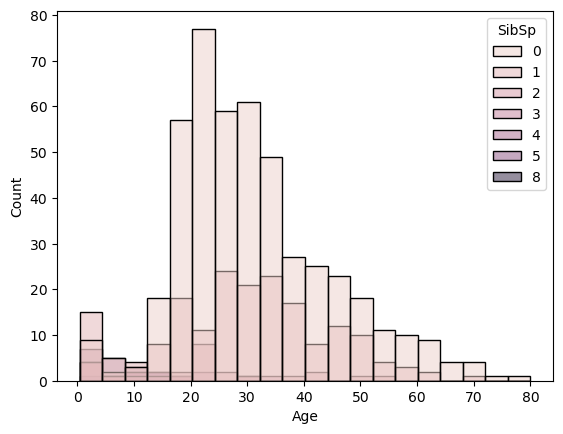

In [294]:
sns.histplot(train_data, x='Age', hue='SibSp')

<Axes: xlabel='Age', ylabel='Count'>

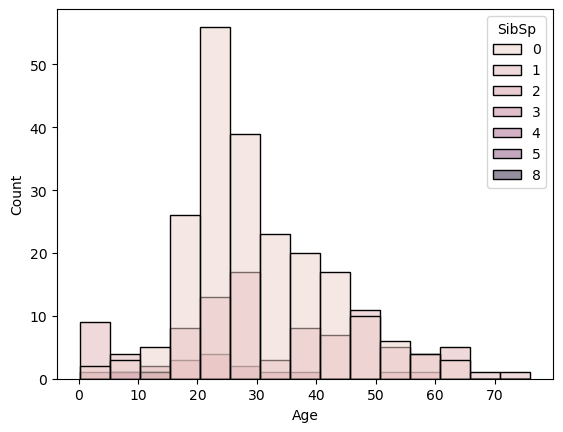

In [295]:
sns.histplot(test_data, x='Age', hue='SibSp')

<Axes: xlabel='Fare', ylabel='Count'>

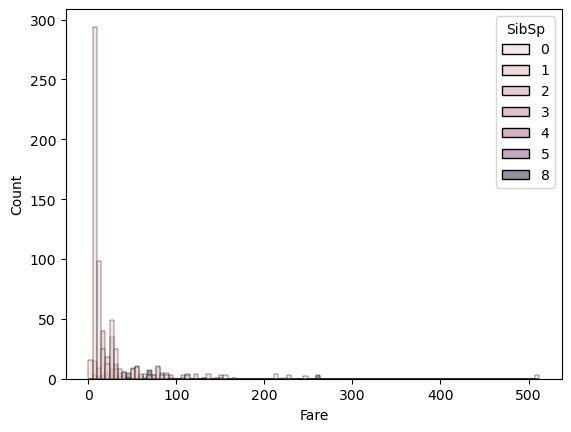

In [296]:
sns.histplot(train_data, x='Fare', hue='SibSp')

<Axes: xlabel='Fare', ylabel='Count'>

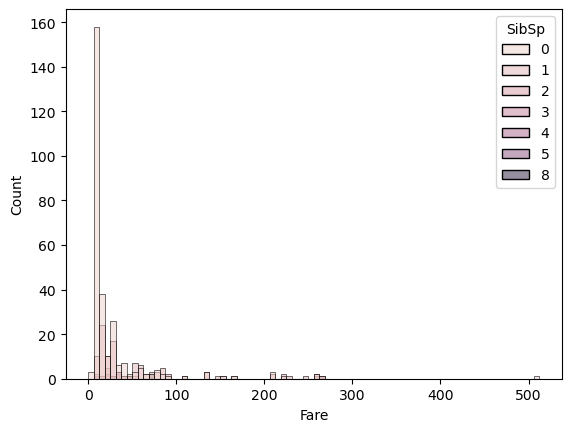

In [297]:
sns.histplot(test_data, x='Fare', hue='SibSp')

## FareLog

<Axes: >

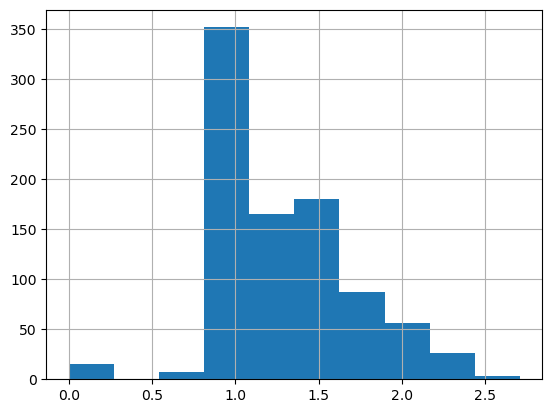

In [298]:
train_data['FareLog'] = train_data['Fare'].map(lambda x: np.log10(x) if x > 0 else 0)
train_data['FareLog'].hist()

<Axes: >

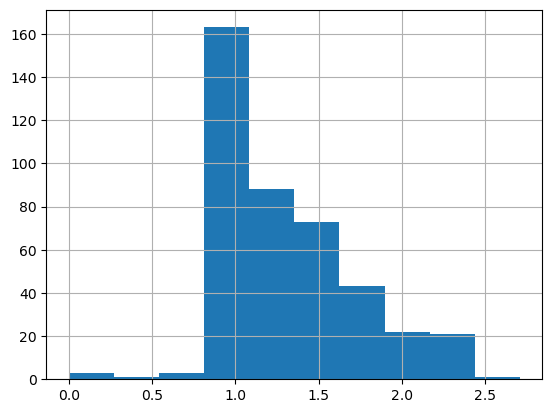

In [299]:
test_data['FareLog'] = test_data['Fare'].map(lambda x: np.log10(x) if x > 0 else 0)
test_data['FareLog'].hist()

In [300]:
corr = train_data.select_dtypes(exclude='O').corr()
corr['FareLog'].abs().sort_values(ascending=False)

FareLog        1.000000
Fare           0.786136
Pclass         0.670489
Parch          0.336857
Survived       0.331805
SibSp          0.323214
Sex            0.264751
Age            0.117585
PassengerId    0.006970
Name: FareLog, dtype: float64

<Axes: xlabel='FareLog', ylabel='Count'>

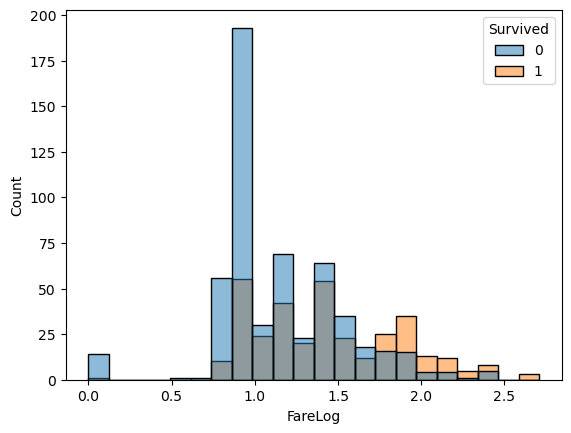

In [301]:
sns.histplot(train_data, x='FareLog', hue='Survived')

## AgeMinor

In [302]:
train_data['AgeMinor'] = (train_data['Age'] < 16.0).astype(int)
test_data['AgeMinor'] = (test_data['Age'] < 16.0).astype(int)

In [303]:
corr = train_data.select_dtypes(exclude='O').corr()
corr['AgeMinor'].abs().sort_values(ascending=False)

AgeMinor       1.000000
Age            0.582875
SibSp          0.352437
Parch          0.351481
Survived       0.136107
Pclass         0.121920
Sex            0.111141
FareLog        0.103362
PassengerId    0.017941
Fare           0.003753
Name: AgeMinor, dtype: float64

In [305]:
pd.crosstab(train_data['AgeMinor'], train_data['Survived'])

Survived,0,1
AgeMinor,,
0,515,293
1,34,49


## Family

In [307]:
train_data['Family'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Family'] = test_data['SibSp'] + test_data['Parch'] + 1

In [308]:
train_data['Family'].value_counts()

Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [314]:
test_data['Family'].value_counts()

Family
1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: count, dtype: int64

In [309]:
corr = train_data.select_dtypes(exclude='O').corr()
corr['Family'].abs().sort_values(ascending=False)

Family         1.000000
SibSp          0.890712
Parch          0.783111
AgeMinor       0.416472
FareLog        0.389193
Age            0.301914
Fare           0.217138
Sex            0.200988
Pclass         0.065997
PassengerId    0.040143
Survived       0.016639
Name: Family, dtype: float64

In [310]:
pd.crosstab(train_data['Family'], train_data['Survived'])

Survived,0,1
Family,,
1,374,163
2,72,89
3,43,59
4,8,21
5,12,3
6,19,3
7,8,4
8,6,0
11,7,0


## Alone

In [311]:
train_data['Alone'] = (train_data['Family'] < 2).astype(int)
test_data['Alone'] = (test_data['Family'] < 2).astype(int)

In [312]:
train_data['Alone'].value_counts()

Alone
1    537
0    354
Name: count, dtype: int64

In [315]:
test_data['Alone'].value_counts()

Alone
1    253
0    165
Name: count, dtype: int64

In [313]:
corr = train_data.select_dtypes(exclude='O').corr()
corr['Alone'].abs().sort_values(ascending=False)

Alone          1.000000
Family         0.690922
SibSp          0.584471
Parch          0.583398
FareLog        0.485150
AgeMinor       0.347400
Sex            0.303646
Fare           0.271832
Survived       0.203367
Age            0.198270
Pclass         0.135207
PassengerId    0.057462
Name: Alone, dtype: float64

In [316]:
pd.crosstab(train_data['Alone'], train_data['Survived'])

Survived,0,1
Alone,,
0,175,179
1,374,163


## Title

In [317]:
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train_data['Title'] = train_data['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Dona', 'Jonkheer', 'Major', 'Rev', 'Sir'], 'Rare').replace(['Mlle', 'Ms', 'Mme'], 'Miss').replace(['Lady'], 'Mrs')
train_data['Title'] = train_data['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
train_data['Title'] = train_data['Title'].replace(['Lady'], 'Mrs')

In [318]:
test_data['Title'] = test_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Dona', 'Jonkheer', 'Major', 'Rev', 'Sir'], 'Rare').replace(['Mlle', 'Ms', 'Mme'], 'Miss').replace(['Lady'], 'Mrs')
test_data['Title'] = test_data['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
test_data['Title'] = test_data['Title'].replace(['Lady'], 'Mrs')

In [319]:
pd.crosstab(train_data['Title'], train_data['Survived'])

Survived,0,1
Title,,
Master,17,23
Miss,55,131
Mr,436,81
Mrs,26,100
Rare,15,7


## FareBinned

In [329]:
train_data['FareBinned'], bins = pd.qcut(train_data['Fare'], q=5, labels=[0, 1, 2, 3, 4], retbins=True)
print(bins)

[  0.       7.8542  10.5     21.6792  39.6875 512.3292]


In [ ]:
sns.histplot(train_data, x='Age', hue='Parch')

In [327]:
def farebin(x):
    if x < bins[1]:
        return 0
    elif x < bins[2]:
        return 1
    elif x < bins[3]:
        return 2
    elif x < bins[4]:
        return 3
    else:
        return 4

In [331]:
test_data['FareBinned'] = test_data['Fare'].apply(farebin)
test_data['FareBinned'].value_counts()

FareBinned
2    95
4    90
0    88
3    78
1    67
Name: count, dtype: int64

In [335]:
corr = train_data.select_dtypes(exclude='O').corr()
corr['FareBinned'].abs().sort_values(ascending=False)

FareBinned     1.000000
FareLog        0.909727
Pclass         0.705206
Fare           0.600883
Alone          0.520277
Family         0.418125
SibSp          0.354974
Parch          0.351317
Survived       0.317783
Sex            0.244943
AgeMinor       0.133536
Age            0.128988
PassengerId    0.004906
Name: FareBinned, dtype: float64

In [336]:
pd.crosstab(train_data['FareBinned'], train_data['Survived'])

Survived,0,1
FareBinned,,
0,140,39
1,147,37
2,99,73
3,100,80
4,63,113


## AgeBinned

In [338]:
train_data['AgeBinned'], bins = pd.qcut(train_data['Age'], q=5, labels=[0, 1, 2, 3, 4], retbins=True)
print(bins)

[ 0.42 19.   25.   31.8  41.   80.  ]


In [339]:
def Agebin(x):
    if x < bins[1]:
        return 0
    elif x < bins[2]:
        return 1
    elif x < bins[3]:
        return 2
    elif x < bins[4]:
        return 3
    else:
        return 4

In [340]:
test_data['AgeBinned'] = test_data['Age'].apply(Agebin)
test_data['AgeBinned'].value_counts()

AgeBinned
4    162
2     75
1     74
0     57
3     50
Name: count, dtype: int64

In [341]:
corr = train_data.select_dtypes(exclude='O').corr()
corr['AgeBinned'].abs().sort_values(ascending=False)

AgeBinned      1.000000
Age            0.924378
AgeMinor       0.486980
Pclass         0.342532
SibSp          0.258726
Family         0.250038
FareBinned     0.159080
Parch          0.152872
Alone          0.147887
FareLog        0.128503
Fare           0.094562
Sex            0.089146
Survived       0.037290
PassengerId    0.037110
Name: AgeBinned, dtype: float64

In [342]:
pd.crosstab(train_data['AgeBinned'], train_data['Survived'])

Survived,0,1
AgeBinned,,
0,85,79
1,92,45
2,77,50
3,81,63
4,89,53


## TicketNumber

In [344]:
def get_ticket_number(ticket):
        num = ticket.split(' ')[-1]
        if num.isdigit():
            return int(num)
        else:
            return -1

In [345]:
train_data['TicketNumber'] = train_data['Ticket'].apply(get_ticket_number)
test_data['TicketNumber'] = test_data['Ticket'].apply(get_ticket_number)

In [346]:
train_data['TicketNumber'].value_counts()

TicketNumber
2343       7
347082     7
1601       7
3101295    6
2144       6
          ..
9234       1
19988      1
2693       1
17612      1
370376     1
Name: count, Length: 679, dtype: int64

In [347]:
test_data['TicketNumber'].value_counts()

TicketNumber
17608     5
113503    4
2343      4
16966     3
220845    3
         ..
2621      1
4133      1
113780    1
369943    1
2668      1
Name: count, Length: 362, dtype: int64

In [357]:
count = 0
for ticketnum in train_data['TicketNumber'].value_counts().index:
    count += test_data.loc[test_data['TicketNumber'] == ticketnum].shape[0]

print(count)

155


In [351]:
corr = train_data.select_dtypes(exclude='O').corr()
corr['TicketNumber'].abs().sort_values(ascending=False)

TicketNumber    1.000000
Pclass          0.284016
FareBinned      0.232706
FareLog         0.211313
Fare            0.155371
Age             0.107355
Survived        0.095605
AgeBinned       0.085983
Sex             0.075693
SibSp           0.046942
Alone           0.036421
Parch           0.032530
AgeMinor        0.026464
PassengerId     0.022100
Family          0.015832
Name: TicketNumber, dtype: float64

## SurvivalGroup

In [366]:
survive_mean_by_ticketnum = train_data[['TicketNumber', 'Survived']].groupby(['TicketNumber']).mean()
survive_mean_by_ticketnum

,Survived
TicketNumber,
-1,0.25
3,0.00
541,1.00
693,0.00
695,0.00
...,...
3101310,0.00
3101311,0.00
3101312,0.00


In [369]:
train_data['SurvivedGroup'] = 0.5
test_data['SurvivedGroup'] = 0.5

for ticketnum, row in survive_mean_by_ticketnum.iterrows():
    train_data.loc[train_data['TicketNumber'] == ticketnum, 'SurvivedGroup'] = row.iloc[0]
    test_data.loc[test_data['TicketNumber'] == ticketnum, 'SurvivedGroup'] = row.iloc[0]

In [370]:
train_data['SurvivedGroup'].value_counts()

SurvivedGroup
0.000000    493
1.000000    269
0.500000     70
0.666667     33
0.750000     12
0.714286      7
0.250000      4
0.333333      3
Name: count, dtype: int64

In [371]:
test_data['SurvivedGroup'].value_counts()

SurvivedGroup
0.500000    280
1.000000     70
0.000000     60
0.750000      4
0.666667      3
0.714286      1
Name: count, dtype: int64

In [375]:
corr = train_data.select_dtypes(exclude='O').corr()
corr['SurvivedGroup'].abs().sort_values(ascending=False)

SurvivedGroup    1.000000
Survived         0.926269
Sex              0.470559
Pclass           0.363933
FareLog          0.357807
FareBinned       0.342198
Fare             0.277714
Alone            0.228890
AgeMinor         0.109080
TicketNumber     0.103216
Parch            0.091478
SibSp            0.037757
Age              0.030865
Family           0.019895
AgeBinned        0.007829
PassengerId      0.000231
Name: SurvivedGroup, dtype: float64